# Classification 

* Penguin dataset

  Palmer Archipelago (Antarctica) penguin dataset is similar as iris flower dataset.It is a great intro dataset for data exploration and visualization.Let's import the dataset and explore it to understand it better.

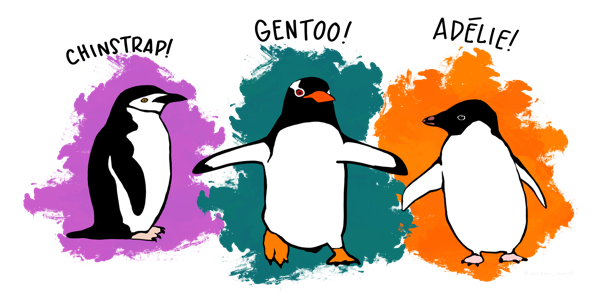

In [54]:
img=Image.open(r"C:\Users\DELL\OneDrive\Pictures\orZWHly.png")
img=img.resize((600,300))
img

The dataset consists of 7 columns.
* species: penguin species (Chinstrap, Adélie, or Gentoo)
* culmen_length_mm: culmen length (mm)
* culmen_depth_mm: culmen depth (mm)
* flipper_length_mm: flipper length (mm)
* body_mass_g: body mass (g)
* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* sex: penguin sex

* Reading in the dataset

In [7]:
import numpy as np,pandas as pd , matplotlib.pyplot as plt , seaborn as sns
df=pd.read_csv(r'C:\Users\DELL\Downloads\penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [8]:
df.shape

(344, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# 1.EDA

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

In [10]:
#checking number of null values in the data 
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [11]:
## fill missing values
df['culmen_depth_mm']=df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['culmen_length_mm']=df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['flipper_length_mm']=df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g']=df['body_mass_g'].fillna(df['body_mass_g'].mean())

In [12]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [13]:
df[df['sex']=='.'].head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [14]:
df.drop(axis=0, inplace=True, index=336)

In [15]:
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

* Data Cleaning done .All missing values imputed

* For detecting the outliers we use Boxplot

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

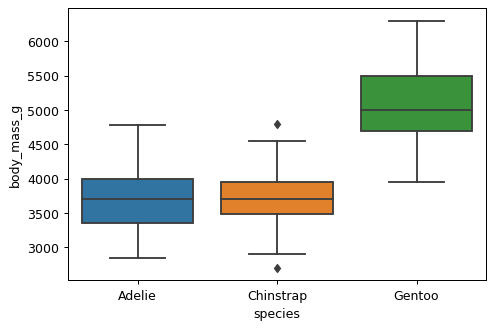

In [17]:
import seaborn as sns
plt.figure(figsize=(6, 4), dpi=90)
sns.boxplot(data=df,x="species",y=df['body_mass_g'])


<AxesSubplot:xlabel='species', ylabel='culmen_length_mm'>

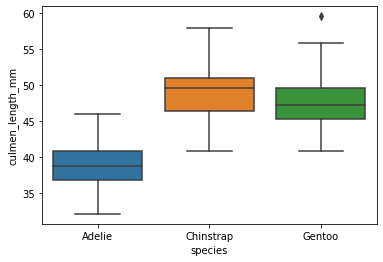

In [18]:
sns.boxplot(data=df,x="species",y=df['culmen_length_mm'])

<AxesSubplot:xlabel='species', ylabel='culmen_depth_mm'>

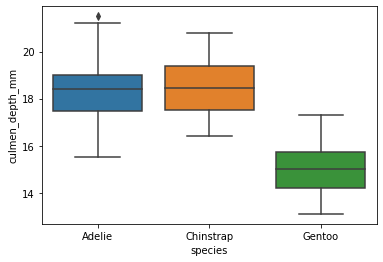

In [19]:
sns.boxplot(data=df,x="species",y=df['culmen_depth_mm'])

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

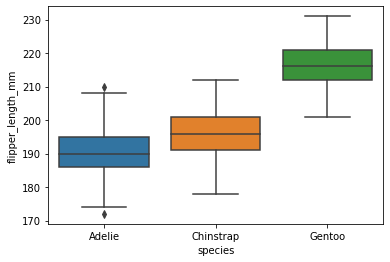

In [20]:
sns.boxplot(data=df,x="species",y=df['flipper_length_mm'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


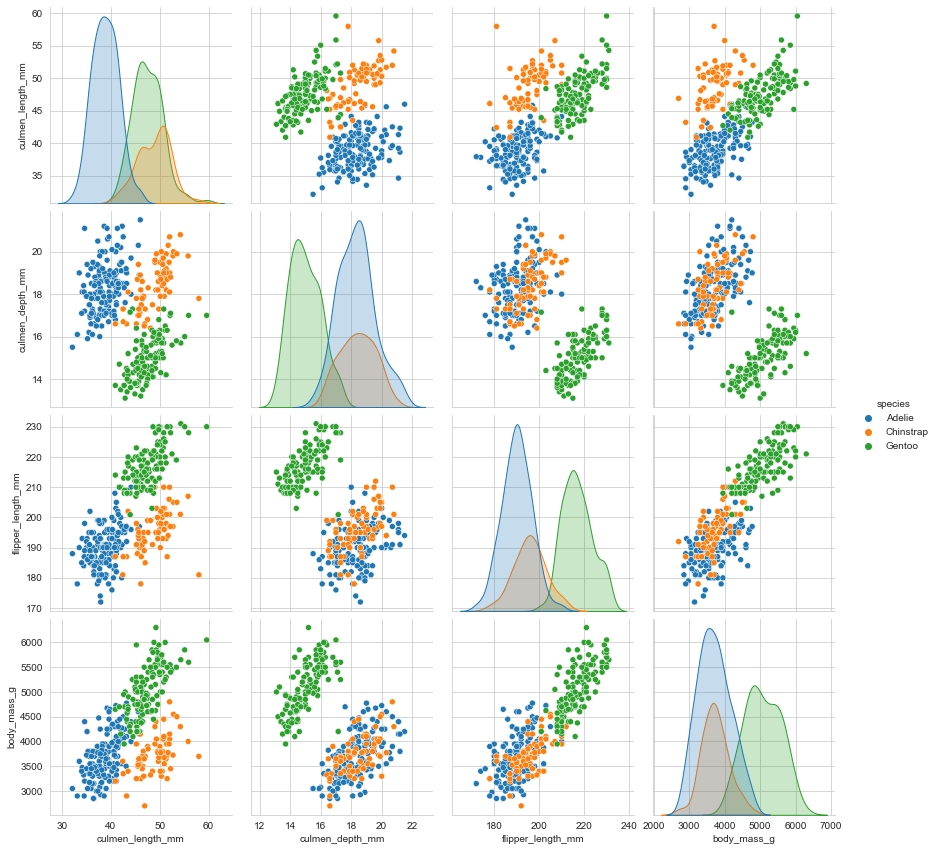

In [21]:

sns.set_style("whitegrid")
sns.pairplot(df,hue="species",size=3);
plt.show()

In [22]:
#Correlation Matrix
corr_matrix=df.corr()
corr_matrix

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235015,0.657102,0.595476
culmen_depth_mm,-0.235015,1.000000,-0.582964,-0.470963
flipper_length_mm,0.657102,-0.582964,1.000000,0.870956
body_mass_g,0.595476,-0.470963,0.870956,1.000000


<AxesSubplot:>

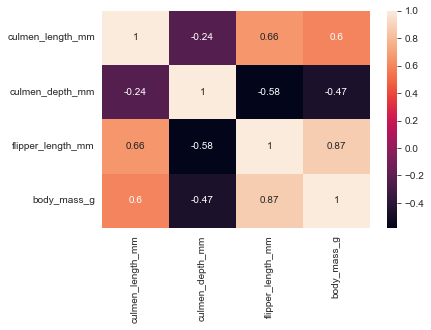

In [23]:
# Plot the matrix in a heatmap
sns.heatmap(data=corr_matrix, annot=True)

# *  Feature Scaling

Variables that are measured at different scales do not contribute equaly to the model fitting and model learned function and might end up creating a biase.
Thus,to deal with this potential problem feature-wise normalization such as MinMax Scaling usually prior
to madel fitting.

In [24]:
#Use MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
cat_columns=["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]
scaler = MinMaxScaler()
df[cat_columns] = scaler.fit_transform(df[cat_columns])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,MALE
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,FEMALE
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,FEMALE
3,Adelie,Torgersen,0.429888,0.482282,0.490088,0.417154,MALE
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,FEMALE


# * Encoding Categorical Features

In [25]:
# Convert categorical variable into dummy/indicator variable
#Dependent and Independent variable
X= pd.get_dummies(df.drop('species',axis=1))
y=df.species

In [26]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,0.254545,0.666667,0.152542,0.291667,0,0,1,0,1
1,0.269091,0.511905,0.237288,0.305556,0,0,1,1,0
2,0.298182,0.583333,0.389831,0.152778,0,0,1,1,0
3,0.429888,0.482282,0.490088,0.417154,0,0,1,0,1
4,0.167273,0.738095,0.355932,0.208333,0,0,1,1,0


# 2. Support Vectore

It is usefull in both cassification and regression problem.For example we have a classification problem.we can easily separate these two classes of pts by using the hyperplanes.

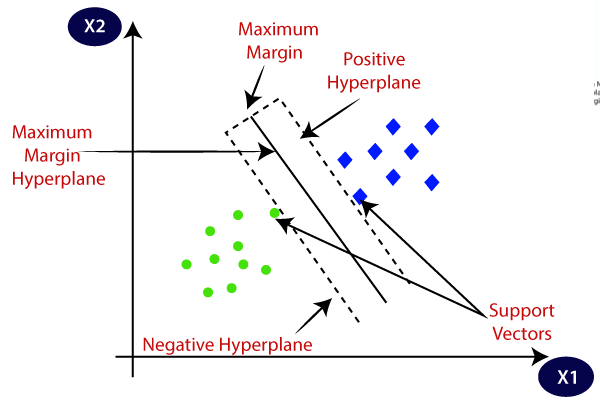

In [27]:
#import Image
from PIL import Image
img=Image.open(r"C:\Users\DELL\OneDrive\Pictures\support-vector-machine-algorithm.png")
img   

The intuition behind the support vectore it create two negative and positive hyperplane which passing through nearest green or blue pts.The distance between these two hyperplane is called Margin.

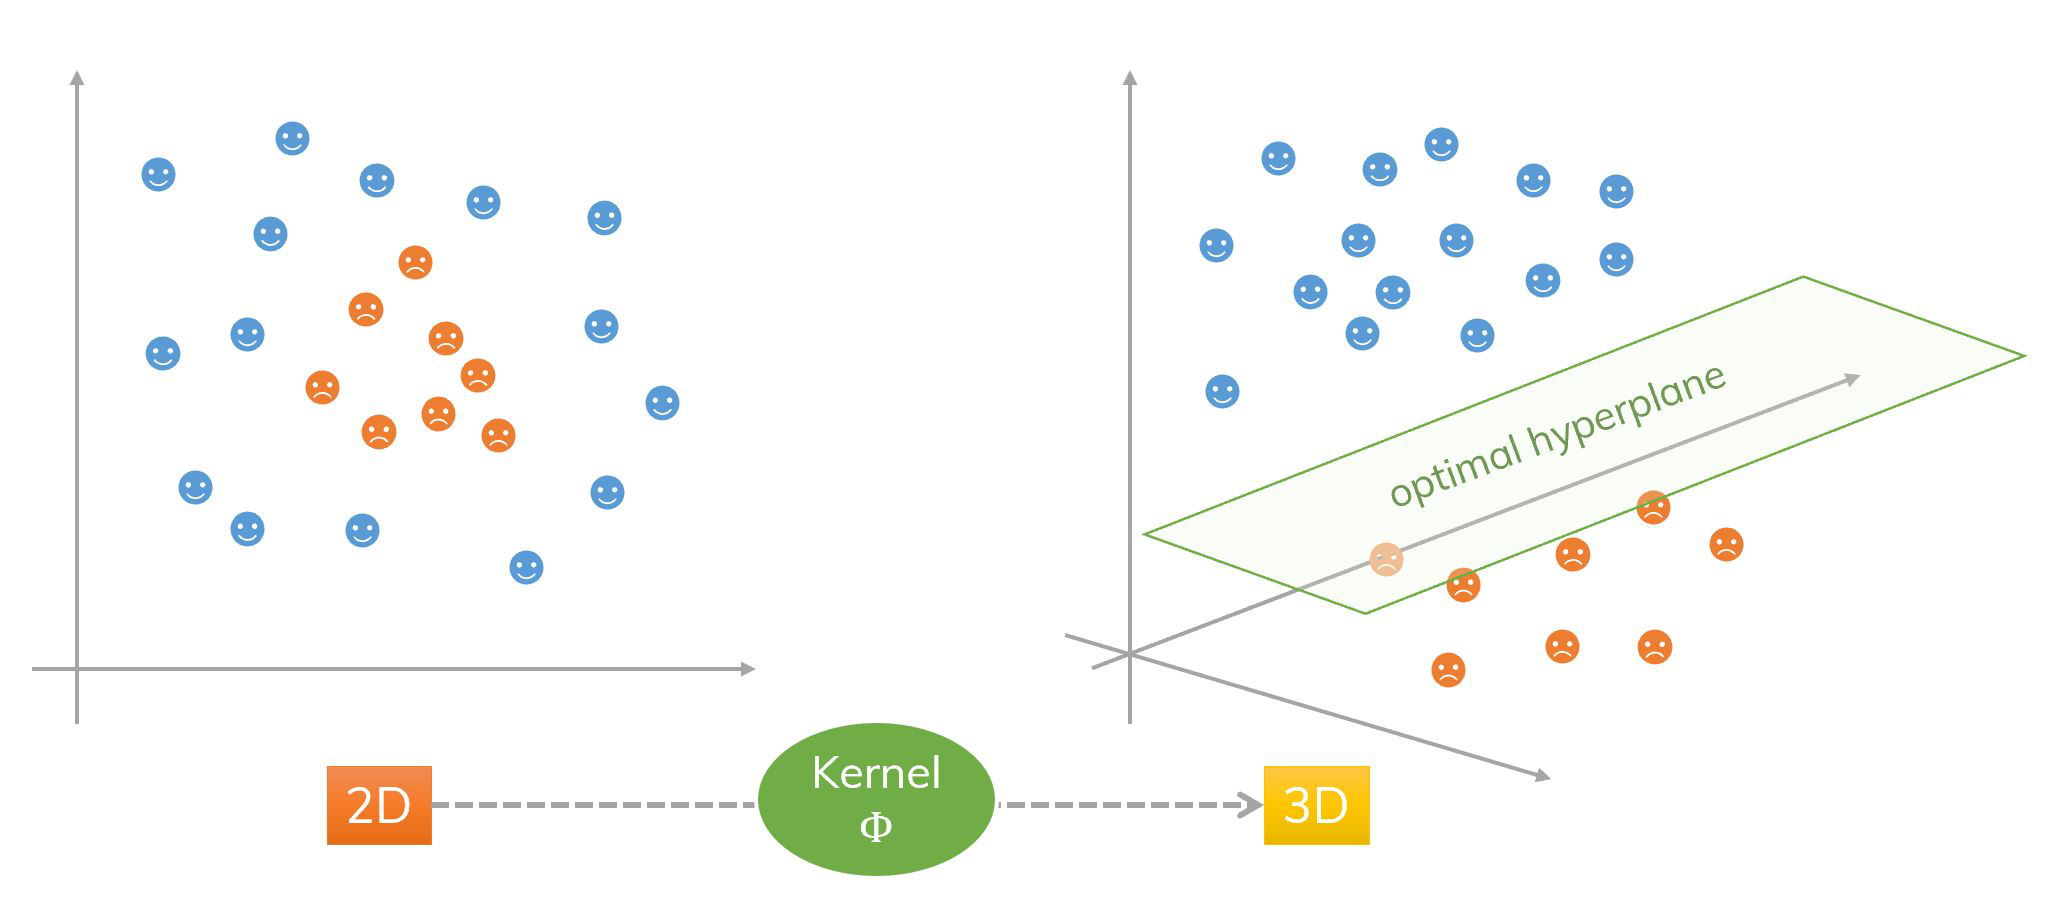

In [28]:
img=Image.open(r"C:\Users\DELL\OneDrive\Pictures\svm-3.jpg")
img 

For non linear separable pts we can't draw the straight line to classify these pts if we try to do it the accuracy will be less than 50%.To solve these problem we use SVM kernels .Main aim of these kernels that it try to convert lower dimension into higher dimension so that we easily classify the pts.

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [33]:
from sklearn.svm import SVC
model=SVC(kernel='poly')
model.fit(x_train,y_train)

SVC(kernel='poly')

In [35]:
pred=model.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,pred)
display(cm)
print("Accuracy of model is:",accuracy_score(y_test,pred))
print("Error rate of model is:",1-accuracy_score(y_test,pred))

array([[47,  1,  0],
       [ 1, 20,  0],
       [ 0,  0, 34]], dtype=int64)

Accuracy of model is: 0.9805825242718447
Error rate of model is: 0.01941747572815533


# 3.KNN 

K-Nearest Neighbour is one of the simplest machine learning algorithms based on Supervised Learning Technique.With the hepl of KNN ,we can easily identify the category or class of a particular datasets.

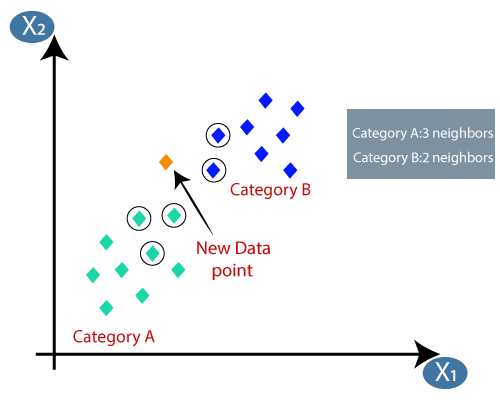

In [37]:
img=Image.open(r"C:\Users\DELL\OneDrive\Pictures\knn.png")
img 

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
y_pred=classifier.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
display(cm)
print("Accuracy of the model is ",accuracy_score(y_test,y_pred)*100,"%")
print("Error rate of model is",100-accuracy_score(y_test,y_pred)*100,"%")

array([[46,  2,  0],
       [ 0, 21,  0],
       [ 0,  0, 34]], dtype=int64)

Accuracy of the model is  98.05825242718447 %
Error rate of model is 1.9417475728155296 %


# Evaluate alternative K-values for better predictions

In [47]:
k_list=list(range(1,50,2))
acc_score=[]
err_rate=[]
for X in k_list:
    classifier=KNeighborsClassifier(n_neighbors=X)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    print('Accuracy Score k=%d : %1.2f'%(X,accuracy_score(y_test,y_pred)))
    acc_score.append(accuracy_score(y_test,y_pred))
    err_rate.append(1-accuracy_score(y_test,y_pred))

Accuracy Score k=1 : 0.98
Accuracy Score k=3 : 0.98
Accuracy Score k=5 : 0.98
Accuracy Score k=7 : 0.98
Accuracy Score k=9 : 0.98
Accuracy Score k=11 : 0.99
Accuracy Score k=13 : 0.99
Accuracy Score k=15 : 0.99
Accuracy Score k=17 : 0.99
Accuracy Score k=19 : 0.99
Accuracy Score k=21 : 0.99
Accuracy Score k=23 : 0.99
Accuracy Score k=25 : 0.98
Accuracy Score k=27 : 0.98
Accuracy Score k=29 : 0.82
Accuracy Score k=31 : 0.83
Accuracy Score k=33 : 0.81
Accuracy Score k=35 : 0.78
Accuracy Score k=37 : 0.71
Accuracy Score k=39 : 0.66
Accuracy Score k=41 : 0.66
Accuracy Score k=43 : 0.66
Accuracy Score k=45 : 0.70
Accuracy Score k=47 : 0.69
Accuracy Score k=49 : 0.68


# 4.Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred=classifier.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy of the model is ",accuracy_score(y_test,y_pred)*100,"%")
print("Error rate of the model is ",round(100-accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy of the model is  99.02912621359224 %
Error rate of the model is  0.97 %


In [53]:
print(confusion_matrix(y_test,y_pred))

[[48  0  0]
 [ 1 20  0]
 [ 0  0 34]]
